In [181]:
import numpy as np
import random
import math
from scipy import stats 
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Setting up Variables & Function

In [62]:
# observation and intervals!!
n = 100
k = 5
expected = n/k
alpha = 0.05
prob = 1-alpha 

chi2_to_test = stats.chi2.ppf(prob, k-1)
z_alpha_over2 = stats.norm.ppf(1-alpha/2)
chi2_to_test, z_alpha_over2

(9.487729036781154, 1.959963984540054)

In [164]:
seed = 12130940
np.random.seed(seed)

def generate_uniform_randu(seed, num_generates=1):
    i = 0
    x_before = seed
    rand_num_list = []
    while i < num_generates:
      x_i = 65539*(x_before)%(2**31)  
      x_before = x_i
      i += 1
      rand_num_list.append(x_i)
    return np.array([x/(2**31)for x in rand_num_list])

def generate_random_numbers(n_observations, seed, generator='Mersenne'):
    if generator == 'Mersenne':
        np.random.seed(seed)
        rand_num = np.random.rand(n_observations)
    elif generator == 'RANDU':
        i = 0
        x_before = seed
        rand_num_list = []
        while i < n_observations:
          x_i = 65539*(x_before)%(2**31)  
          x_before = x_i
          i += 1
          rand_num_list.append(x_i)
        rand_num = np.array([x/(2**31)for x in rand_num_list])
    elif generator == 'MINSTD':
        i = 0
        x_before = seed
        rand_num_list = []
        while i < n_observations:
          x_i = 16807*(x_before)%(2**31 - 1)  
          x_before = x_i
          i += 1
          rand_num_list.append(x_i)
        rand_num = np.array([x/(2**31 -1)for x in rand_num_list])
    else:
        rand_num = np.zeros(n_observations)
    return rand_num

def calculate_interval_count(rand_num_list, interval_range):
    new_dict = {}
    for i in range(len(interval_range)):
        if i == len(interval_range)-1:
            break
        if i == 0:
            first_bracket= '['
        else:
            first_bracket='('

        count = 0
        for j in rand_num_list:
            if i == 0:
                if (j >= interval_range[i]) and (j <= interval_range[i+1]):
                    count += 1
            else:
                if (j > interval_range[i]) and (j <= interval_range[i+1]):
                    count += 1
        new_dict[f"{first_bracket}{round(interval_range[i],1)}, {round(interval_range[i+1],1)}]"] = count
    return new_dict


def calcualte_runs_above_below(run_test_sequence):
    n_run = 1
    for i in range(len(run_test_sequence)):
        if i == 0:
            continue
        if run_test_sequence[i] != run_test_sequence[i-1]:
            n_run += 1
            
    return n_run

def calculate_run_above_below_mean(rand_num_list):
    run_test_sequence = rand_num_list >= 0.5
    num_greater = np.sum(run_test_sequence)
    num_lower = n - num_greater

    B_num = calcualte_runs_above_below(run_test_sequence)

    mean_b = ((2*num_greater*num_lower)/n) + 1/2
    var_b = ((2*num_greater*num_lower)*(2*num_greater*num_lower - n))/((n**2)*(n-1))
    Z_btest = abs((B_num - mean_b)/ math.sqrt(var_b))

    print(f"""
    Number of Runs: {B_num}
    Number of obs >= 0.5: {num_greater}
    Number of obs < 0.5: {num_lower}
    B Mean: {mean_b}
    B Variance: {var_b}
    Z_0 : {Z_btest}
    Zalpha/2: {z_alpha_over2}
    Is Z_btest greater than Z0?: {Z_btest > z_alpha_over2}
    If True, reject Independence
    else accept Independence
    """)
    return Z_btest

def test_uniform(rand_num_list):
    interval_range = np.linspace(0, 1, k+1)
    f_square_error = lambda x: ((x-expected)**2)/expected
    dict_interval = calculate_interval_count(rand_num_list, interval_range)
    chi_squared_results = np.sum(f_square_error(np.array(list(dict_interval.values()))))
    print(f"""
    Chi squared result: {chi_squared_results}
    Chi squared degree {k}:  {chi2_to_test}
    Chi square result > Chi squared to test? {chi_squared_results > chi2_to_test}
    If True, reject H0 - Uniform
    else Accept Uniform
    """)
    
def calcualte_num_runs_up_down(rand_num_list):
    n_run = 1
    up_down_sequences = []
    for i in range(len(rand_num_list)):
        if i == 0:
            continue
        if rand_num_list[i] > rand_num_list[i-1]:
            up_down_sequences.append(1)
        else:
            up_down_sequences.append(0)

    for i in range(len(up_down_sequences)):
        if i == 0:
            continue
        if up_down_sequences[i] != up_down_sequences[i-1]:
            n_run +=1

    return n_run

def test_run_up_and_down(rand_num_list):
    n = len(rand_num_list)
    A_num = calcualte_num_runs_up_down(rand_num_list)
    
    mean_a = (2*n - 1)/3
    var_a = (16*n - 29)/ 90
    Z_a0 = (A_num - mean_a)/ math.sqrt(var_a)

    print(f"""
    Number of Runs: {A_num}
    A Mean: {mean_a}
    A Variance: {var_a}
    Z_a0 : {Z_a0}
    Zalpha/2: {z_alpha_over2}
    Is Z_a0 greater than Z0?: {abs(Z_a0) > z_alpha_over2}
    If True, reject Independence
    else accept Independence
    """)
    return Z_btest

### 1. Mersene

Uniform test

In [140]:
for i in [100, 200, 500, 1000, 5000, 15000, 150000]:
    n = i
    k = 5
    expected = n/k
    alpha = 0.05
    prob = 1-alpha 

    chi2_to_test = stats.chi2.ppf(prob, k-1)
    z_alpha_over2 = stats.norm.ppf(1-alpha/2)
    chi2_to_test, z_alpha_over2
    mersene_rand_num = generate_random_numbers(n, seed)
    randu_rand_num = generate_random_numbers(n, seed, 'RANDU')
    minstd_rand_num = generate_random_numbers(n, seed, 'MINSTD')
    print('rand_num', i)
    print("Mersenne Twister")
    test_uniform(mersene_rand_num)
    print("Randu")
    test_uniform(randu_rand_num)
    print("MINSTD")
    test_uniform(minstd_rand_num)

rand_num 100
Mersenne Twister

    Chi squared result: 2.8
    Chi squared degree 5:  9.487729036781154
    Chi square result > Chi squared to test? False
    If True, reject H0 - Uniform
    else Accept Uniform
    
Randu

    Chi squared result: 1.2000000000000002
    Chi squared degree 5:  9.487729036781154
    Chi square result > Chi squared to test? False
    If True, reject H0 - Uniform
    else Accept Uniform
    
MINSTD

    Chi squared result: 3.5
    Chi squared degree 5:  9.487729036781154
    Chi square result > Chi squared to test? False
    If True, reject H0 - Uniform
    else Accept Uniform
    
rand_num 200
Mersenne Twister

    Chi squared result: 2.1999999999999997
    Chi squared degree 5:  9.487729036781154
    Chi square result > Chi squared to test? False
    If True, reject H0 - Uniform
    else Accept Uniform
    
Randu

    Chi squared result: 2.6
    Chi squared degree 5:  9.487729036781154
    Chi square result > Chi squared to test? False
    If True, rejec

### Independence test

In [179]:
for i in [100, 200, 1000, 5000, 10000, 50000, 100000, 500000]:
    n = i
    k = 5
    expected = n/k
    alpha = 0.05
    prob = 1-alpha 

    chi2_to_test = stats.chi2.ppf(prob, k-1)
    z_alpha_over2 = stats.norm.ppf(1-alpha/2)
    chi2_to_test, z_alpha_over2
    mersene_rand_num = generate_random_numbers(n, seed)
    randu_rand_num = generate_random_numbers(n, seed, 'RANDU')
    minstd_rand_num = generate_random_numbers(n, seed, 'MINSTD')
    print('rand_num', i)
    print("Mersenne Twister")
    test_run_up_and_down(mersene_rand_num)
    print("Randu")
    test_run_up_and_down(randu_rand_num)
    print("MINSTD")
    test_run_up_and_down(minstd_rand_num)

rand_num 100
Mersenne Twister

    Number of Runs: 66
    A Mean: 66.33333333333333
    A Variance: 17.455555555555556
    Z_a0 : -0.07978328380233364
    Zalpha/2: 1.959963984540054
    Is Z_a0 greater than Z0?: False
    If True, reject Independence
    else accept Independence
    
Randu

    Number of Runs: 64
    A Mean: 66.33333333333333
    A Variance: 17.455555555555556
    Z_a0 : -0.5584829866163423
    Zalpha/2: 1.959963984540054
    Is Z_a0 greater than Z0?: False
    If True, reject Independence
    else accept Independence
    
MINSTD

    Number of Runs: 67
    A Mean: 66.33333333333333
    A Variance: 17.455555555555556
    Z_a0 : 0.1595665676046707
    Zalpha/2: 1.959963984540054
    Is Z_a0 greater than Z0?: False
    If True, reject Independence
    else accept Independence
    
rand_num 200
Mersenne Twister

    Number of Runs: 127
    A Mean: 133.0
    A Variance: 35.233333333333334
    Z_a0 : -1.0108212983788905
    Zalpha/2: 1.959963984540054
    Is Z_a0 greater t

### Speed Test

In [ ]:
def create_loop_time_generates(generator='Mersenne'):
    start_time = time.time()
    x_axis_seconds = [10, 20, 30, 40, 50 ,60]
    num_generates = []
    n_gen_counter = 0
    flag_50 = 0
    flag_40 = 0
    flag_30 = 0
    flag_20 = 0
    flag_10 = 0
    while True:

        rand_num_create = generate_random_numbers(1, seed, generator)
        end_time = time.time()
        n_gen_counter += 1
        n_gen = n_gen_counter
        if end_time - start_time >= 60:
            num_generates.append(n_gen)
            break
        elif end_time - start_time >= 50:
            if flag_50 == 0:
                num_generates.append(n_gen)
                flag_50 = 1
        elif end_time - start_time >= 40:
            if flag_40 == 0:
                num_generates.append(n_gen)
                flag_40 = 1
        elif end_time - start_time >= 30:
            if flag_30 == 0:
                num_generates.append(n_gen)
                flag_30 = 1
        elif end_time - start_time >= 20:
            if flag_20 == 0:
                num_generates.append(n_gen)
                flag_20 = 1
        elif end_time - start_time >= 10:
            if flag_10 == 0:
                num_generates.append(n_gen)
                flag_10 = 1
    return num_generates

In [163]:
num_generates_mersenne =  create_loop_time_generates('Mersenne')
num_generates_randu = create_loop_time_generates('RANDU')
num_generates_minstd = create_loop_time_generates('MINSTD')

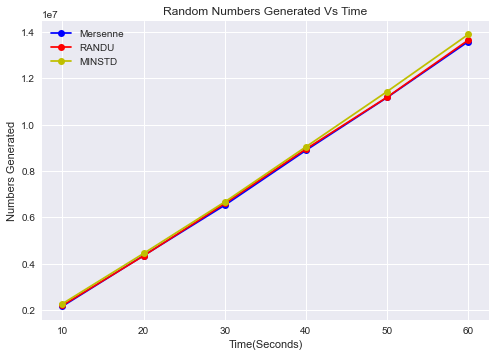

In [178]:
color = ['b-o', 'r-o', 'y-o']
num_loop = [num_generates_mersenne, num_generates_randu, num_generates_minstd]
labels = ['Mersenne', 'RANDU', 'MINSTD']
x_axis_seconds = [10, 20, 30, 40, 50 ,60]
fig, ax = plt.subplots()
k = 0
for i in num_loop:
    bic_score_list = []
    ax.plot(x_axis_seconds , i, color[k], label=f'{labels[k]}')
    k = k+1
ax.set_xlabel('Time(Seconds)')
ax.set_ylabel('Numbers Generated')
ax.set_title('Random Numbers Generated Vs Time')
ax.legend()
plt.show(fig)

In [169]:
num_generates_mersenne, num_generates_randu, num_generates_minstd

([2170654, 4355362, 6528680, 8894872, 11174382, 13584697],
 [2206036, 4346767, 6600269, 8949821, 11185733, 13646178],
 [2279860, 4447642, 6668958, 9044771, 11428802, 13891169])

In [180]:
13584697/60, 13646178/60, 13891169/60

(226411.61666666667, 227436.3, 231519.48333333334)